In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib

# 1. Fitting the model

In [2]:
df = pd.read_csv('./Data Exploration/wdbc.csv')
labels = df['B/M']
df.drop(['ID', 'B/M'], axis=1, inplace=True)
features = df[['Radius', 'Texture', 'Concavity', 'ConcavePoints', 'ConcavityWorst', 'ConcavePointsWorst', 'SymmetryWorst']]

# 1.1 Standardization

In [3]:
# Standardize features
features[features.select_dtypes(['float64', 'int64']).columns.values] = ColumnTransformer([
        ('StandardScaler', StandardScaler(), features.columns.values)
    ]).fit_transform(df)

/tmp/ipykernel_8041/4033405741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.select_dtypes(['float64', 'int64']).columns.values] = ColumnTransformer([


# 1.2 Stratified train/test split

In [4]:
labels.value_counts()

B    357
M    212
Name: B/M, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0, stratify=labels)

# 1.3 Model Training
- Describe the training process, including the parameters involved and how they fit
- concerns about underfitting and/or overfitting
- and concerns about the convergence of the optimisation

In [6]:
model = SGDClassifier(loss='log_loss', random_state=12).fit(x_train, y_train)
y_pred = model.predict(x_test)  # Model classifications

In [7]:
pd.Series(y_pred).head()

0    B
1    B
2    B
3    B
4    B
dtype: object

# 2. Model Evaluation

# 2.1 Learning Curves
For determining whether our model is over-fitting the data.

As the model is trained on more samples, the training accuracy will increase. We can see that after training on ~110 and ~275 samples, the testing accuracy starts to reduce.

This shows that our model is over-fitting the data as the testing accuracy starts to reduce, as the model is prone to variance in the testing data. Training the model on ~250 samples would give us a model which generalises well.

**Conclusions**:
- Our model is over-fitting the data.
- We need more samples in our dataset.

In [8]:
def plot_log_loss(train_sizes, train_y, test_y):
    train_y_avg, test_y_avg = [], []

    for i in range(len(train_sizes)):
        train_y_avg.append(np.average(train_y[i]))
        test_y_avg.append(np.average(test_y[i]))

    plt.plot(train_sizes, train_y_avg)
    plt.plot(train_sizes, test_y_avg)

    return train_sizes, train_y_avg, test_y_avg

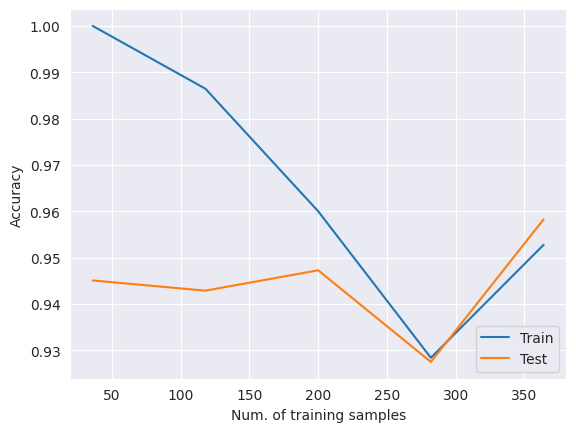

In [9]:
train_sizes_abs_accuracy, train_accuracy, test_accuracy = learning_curve(estimator=model, X=x_train, y=y_train, scoring='accuracy', cv=5)
train_sizes_abs_error, train_error, test_error = learning_curve(estimator=model, X=x_train, y=LabelEncoder().fit_transform(y_train), scoring='recall', cv=5)
# Array of tuples (train_size, train_score)
train_avg_accuracy, test_avg_accuracy, train_avg_error, test_avg_error = [], [], [], []

for i in range(len(train_sizes_abs_accuracy)):
    train_avg_accuracy.append(np.average(train_accuracy[i]))
    test_avg_accuracy.append(np.average(test_accuracy[i]))

for i in range(len(train_sizes_abs_error)):
    train_avg_error.append(np.average(train_error[i]))
    test_avg_error.append(np.average(test_error[i]))

# Accuracy learning curve
plt.plot(train_sizes_abs_accuracy, train_avg_accuracy)
plt.plot(train_sizes_abs_accuracy, test_avg_accuracy)
plt.legend(['Train', 'Test'], loc=4)
plt.ylabel('Accuracy')
plt.xlabel('Num. of training samples')
plt.savefig('logistic_regression_learning_curve.png')

# 2.2 Classification Reports

Classification algorithms have the following types of classifications:
- True positives (TP)
- False positives (FP)
- True negatives (TN)
- False negatives (FN)

Since our model classifies cancerous cells, the cost of a False Negative is much greater than the rest. Classifying a cell as Benign when it is Malignant can have terrible consequences on the patient.

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

True negatives: 68
False negatives: 2
True positives: 40
False positives: 4


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

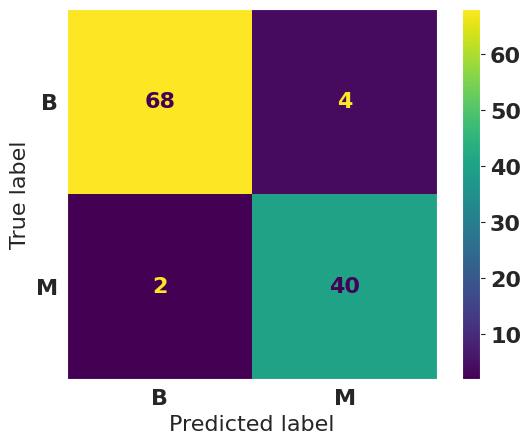

In [37]:
c = confusion_matrix(y_test, y_pred)
print(f'True negatives: {c[0][0]}')
print(f'False negatives: {c[1][0]}')
print(f'True positives: {c[1][1]}')
print(f'False positives: {c[0][1]}')


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
ax.grid(False)
c = ConfusionMatrixDisplay(c, display_labels=model.classes_)
c.plot(ax=ax)
plt.savefig('conf_lr.png')


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        72
           M       0.91      0.95      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# 2.3 Evaluation Metrics

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label="M")}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label="M", zero_division=0)}')

Accuracy: 0.9473684210526315
Recall: 0.9523809523809523
Precision: 0.9090909090909091


# 2.4 Dummy Model

In [13]:
dm = DummyClassifier()
dm.fit(x_train, y_train)
dummy_score = dm.score(x_test, y_test)
print(f'{"Our model beats the dummy model" if accuracy > dummy_score else "Our model does not beat the dummy model."}')

Our model beats the dummy model


# 3. Hyperparameter Tuning

# 3.1 ROC Curve
Tuning the threshold p-value and seeing how this affects our classifications.

ROC Curves shows us the True Positive rate (TP / (TP + FN)) against the False Positive Rate (FP / (FP + TN)) with different thresholds.

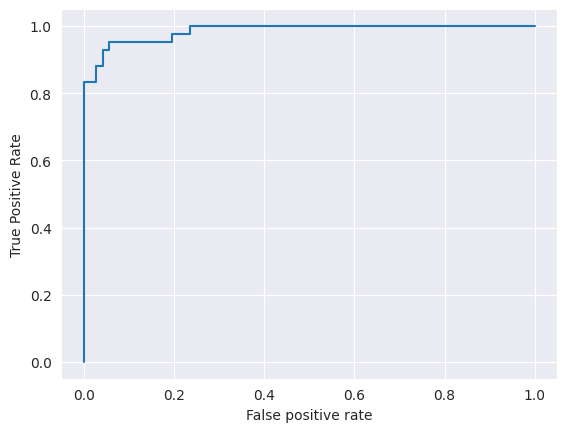

In [14]:
# First col is the p that a sample is class B, second col is p that sample is class M
y_pred_prob = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label = 'M')

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.savefig('lr_roc_curve.png')
plt.show()

We want to find the threshold which finds the balance between the TPR and the FPR.

Since our model is being used to classify tumorous cells, it is important to maximise the TPR.

In [15]:
for idx, metric in enumerate(list(zip(tpr, fpr, thresholds))[1::]):
    tpr_, fpr_, threshold =  metric[0], metric[1], metric[2]
    print(f'''
    TPR: {tpr_}
    FPR: {fpr_}
    threshold: {threshold}
    threshold_idx: {idx + 1}
    ''')


    TPR: 0.023809523809523808
    FPR: 0.0
    threshold: 0.9999999999995954
    threshold_idx: 1
    

    TPR: 0.8333333333333334
    FPR: 0.0
    threshold: 0.9903788019628442
    threshold_idx: 2
    

    TPR: 0.8333333333333334
    FPR: 0.027777777777777776
    threshold: 0.9836166900610063
    threshold_idx: 3
    

    TPR: 0.8809523809523809
    FPR: 0.027777777777777776
    threshold: 0.9564445572418185
    threshold_idx: 4
    

    TPR: 0.8809523809523809
    FPR: 0.041666666666666664
    threshold: 0.9441211030431246
    threshold_idx: 5
    

    TPR: 0.9285714285714286
    FPR: 0.041666666666666664
    threshold: 0.9250127468259038
    threshold_idx: 6
    

    TPR: 0.9285714285714286
    FPR: 0.05555555555555555
    threshold: 0.9082712946907651
    threshold_idx: 7
    

    TPR: 0.9523809523809523
    FPR: 0.05555555555555555
    threshold: 0.6330110649578075
    threshold_idx: 8
    

    TPR: 0.9523809523809523
    FPR: 0.19444444444444445
    threshold: 0.1556980

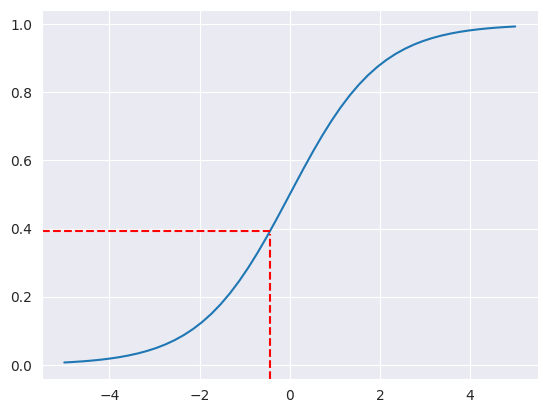

In [16]:
def sigmoid(x):
    return 1 / (1 + (np.e ** -x))

fig, ax = plt.subplots()
ax.grid(True)
x = np.linspace(-5, 5)
plt.plot(x, list(map(sigmoid, x)))
plt.axhline(y=0.3942, color='r', xmax=0.46, linestyle='dashed')
plt.axvline(x=-0.43, color='r', ymax=0.3942, linestyle='dashed')
plt.savefig('sigmoid_new_threshold.png')
plt.show()

# 3.2 Threshold tuning
**Using ROC to change our threshold to reduce False Negative classifications.**

- For our application, the cost of a False Negative is greater than other classifications.

We want to:
- Minimize false negatives.
- Increase true positives.

Thus we must find a balance between the True Positive Rate (TPR) and False Positive Rate (FPR).

In [17]:
threshold = thresholds[8]
threshold

0.6330110649578075

# 3.3 AUC
AUC is the area under the ROC graph. **We can use AUC to compare two classification models**.

In [18]:
roc_auc_score(y_true=y_test, y_score=y_pred_prob[:, 1])

0.9851190476190476

# 3.4 Testing model with new threshold
The new threshold has changed the TPR and FPR rates. How does this affect our models performance?

- Create precision-recall curve?

In [19]:
new_predictions = []

for p in y_pred_prob[:, 1]:
    # Probability of M exceeds threshold, classify as M
    if p >= threshold:
        new_predictions.append('M')

    else:
        new_predictions.append('B')

new_predictions = pd.Series(new_predictions)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        72
           M       0.91      0.95      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [21]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        72
           M       0.91      0.95      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# 3.5 Learning rate

In [22]:
param_grid = {
    'learning_rate': ['constant'],
    'eta0': np.linspace(0.01, 1)
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_log_loss')
opt_model = grid.fit(x_train, y_train)
opt_params = opt_model.best_params_
print(opt_params)
optimal_learning_rate = opt_params['eta0']

{'eta0': 0.19183673469387755, 'learning_rate': 'constant'}


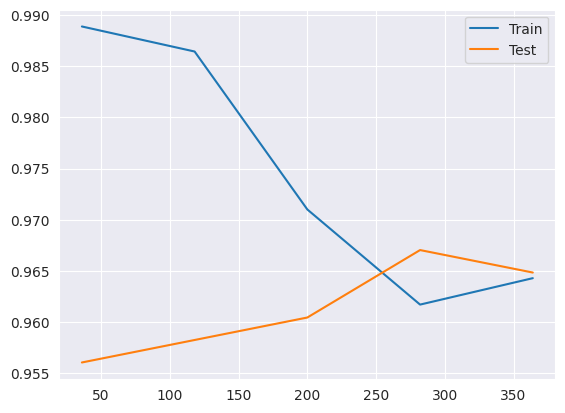

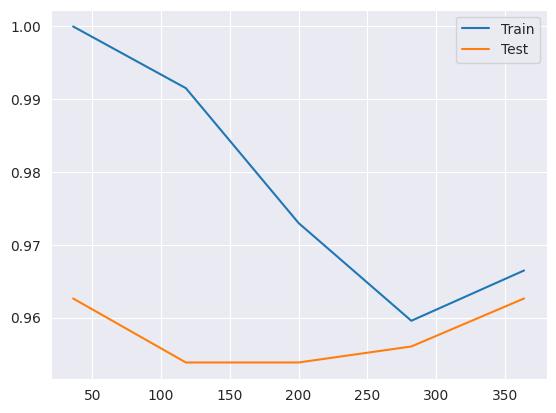

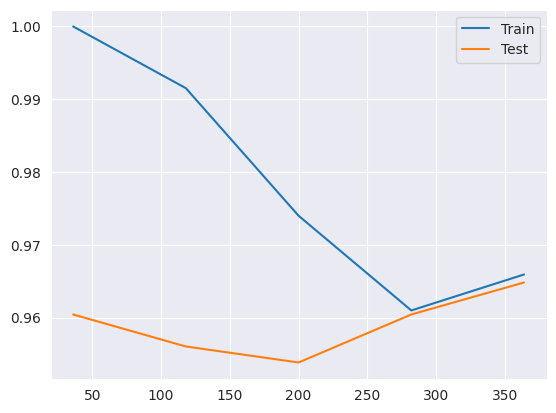

In [23]:
plot_log_loss(*learning_curve(estimator=SGDClassifier(loss='log_loss', random_state=12, learning_rate='constant', eta0=0.01), X=x_train, y=y_train, scoring='accuracy'))
plt.legend(['Train', 'Test'])
plt.show()
plot_log_loss(*learning_curve(estimator=SGDClassifier(loss='log_loss', random_state=12, learning_rate='constant', eta0=optimal_learning_rate), X=x_train, y=y_train, scoring='accuracy'))
plt.legend(['Train', 'Test'])
plt.show()
plot_log_loss(*learning_curve(estimator=SGDClassifier(loss='log_loss', random_state=12, learning_rate='constant', eta0=0.1), X=x_train, y=y_train, scoring='accuracy'))
plt.legend(['Train', 'Test'])
plt.show()

In [24]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [25]:
model.coef_

array([[ 3.32347939,  1.83383472, -4.14713889,  6.79640081,  2.34997606,
         0.97907787,  1.70132635]])

In [26]:
model.intercept_

array([-0.63535144])